# Carbon dioxide (CO2)

Databases used:
- Atmospheric C02 from the Muana Loa Observatory ([ESRL at NOAA](https://www.esrl.noaa.gov/))
- Oceanic values from the Hawaii Ocean Time-series ([HOT](http://hahana.soest.hawaii.edu/hot))

In [59]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

import sys
sys.path.append("../../../functions")
from data_downloaders import download_HOT_CO2_data, download_MLO_CO2_data

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting import plot_timeseries
from ind_setup.plotting_int import plot_timeseries_interactive
from ind_setup.tables import plot_df_table

## Observations from NOAA

In [60]:
url = 'https://www.esrl.noaa.gov/gmd/aftp/data/trace_gases/co2/in-situ/surface/txt/co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt'
MLO_data = download_MLO_CO2_data(url)

## Observations from U.Hawaii

In [61]:
# Get the HOT data from UH
url = 'https://hahana.soest.hawaii.edu/hot/hotco2/HOT_surface_CO2.txt'
HOT_data = download_HOT_CO2_data(url)


## Plotting

Muana Loa Observatory

In [62]:
dict_plot = [{'data' : MLO_data, 'var' : 'CO2', 'ax' : 1, 'label' : 'MLO: CO2'},]

In [63]:
plot_timeseries_interactive(dict_plot, trendline = True);


In [64]:
from scipy.stats import linregress
MLOy = MLO_data[['CO2']].groupby(MLO_data.index.year).mean()
MLOy.index = pd.to_datetime(MLOy.index, format = '%Y')
slope, intercept, r_value, p_value, std_err = linregress(MLOy.index.year, MLOy['CO2'])

Annual Stats

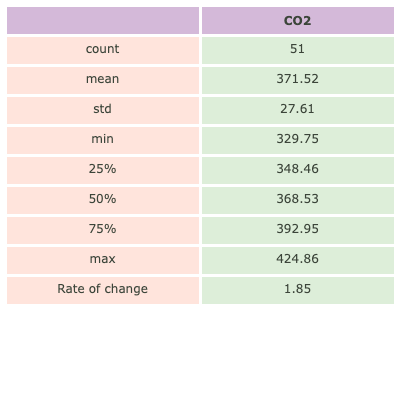

In [65]:
d = MLOy.describe()
d.loc['Rate of change'] = slope
fig = plot_df_table(np.round(d, 2), figsize = (400, 400))
